In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


sess = tf.InteractiveSession()
z_dim = 100
batchs= 128
mnist = input_data.read_data_sets("/home/zhaocq/桌面/tensorflow/mnist/raw/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/t10k-images-idx3-ubyte.gz
Extracting /home/zhaocq/桌面/tensorflow/mnist/raw/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def weight_variable(shape,name):
    initial = tf.random_normal(shape, stddev=0.01)
    return tf.Variable(initial,name = name)
def bias_variable(shape,name):
    initial = tf.zeros(shape)  #给偏置增加小的正值用来避免死亡节点；
    return tf.Variable(initial,name = name)
#生成器随机噪声100维
z = tf.placeholder(tf.float32,shape=[None,100],name = 'z')
#鉴别器准备MNIST图像输入设置
x = tf.placeholder(tf.float32,shape=[None,784],name = 'x')
#生成器参数定义
g_w1 = weight_variable([100,128],'g_w1')
g_b1 = bias_variable([128],'g_b1')
g_w2 = weight_variable([128,784],'g_w2')
g_b2 = bias_variable([784],'g_b2')
generator_dict = [g_w1,g_b1,g_w2,g_b2]
#鉴别器参数定义
d_w1 = weight_variable([784,128],'d_w1')
d_b1 = bias_variable([128],'d_b1')
d_w2 = weight_variable([128,1],'d_w2')
d_b2 = bias_variable([1],'d_b2')
discriminator_dict = [d_w1,d_b1,d_w2,d_b2]


In [3]:
#生成器网络定义
def generator(z,generator_dict):
    g_h1 = tf.nn.leaky_relu(tf.matmul(z,g_w1) + g_b1)
    g_h2 = tf.nn.sigmoid(tf.matmul(g_h1,g_w2) + g_b2)
    return g_h2
#定义鉴别器
def discrimnator(x,discriminator_dict):
    d_h1 = tf.nn.leaky_relu(tf.matmul(x,d_w1)+d_b1)
    d_logit = tf.matmul(d_h1,d_w2)+d_b2
    d_prob = tf.nn.sigmoid(d_logit)
    return d_prob,d_logit


g_sample = generator(z,generator_dict)
d_real,d_logit_real = discrimnator(x,discriminator_dict)
d_fake,d_logit_fake = discrimnator(g_sample,discriminator_dict)
#定义损失
d_loss = - tf.reduce_mean(tf.log(d_real) + tf.log(1.- d_fake))
g_loss =  tf.reduce_mean(tf.square(1.-d_fake)-tf.log(d_fake))
#g_loss = - tf.reduce_mean(tf.log(d_fake))
#定义优化器，仅优化相关参数
d_slover = tf.train.AdamOptimizer().minimize(d_loss,var_list = discriminator_dict)
g_slover = tf.train.AdamOptimizer().minimize(g_loss,var_list = generator_dict)


In [4]:
#训练过程
def sample_z(m,n):
    '''Uniform prior for G(z)'''
    return np.random.uniform(-1.,1.,size=[m,n])
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


sess.run(tf.global_variables_initializer())
i=0

for epoch in range(100):
    #输出image
    for it in range (500):
        x_md,_ =mnist.train.next_batch(batchs)
        _,d_loss_curr = sess.run([d_slover,d_loss],feed_dict={x: x_md, z: sample_z(batchs,z_dim)})
        _,g_loss_curr = sess.run([g_slover,g_loss],feed_dict={z: sample_z(batchs,z_dim)})
    if epoch % 10 == 0:
        samples = sess.run(g_sample,feed_dict={z: sample_z(16,100)})
        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)),bbox_inches = 'tight')
        i += 1
        plt.close(fig) 
        print('iter:{}'.format(epoch),'d loss : {:.4}'.format(d_loss_curr),'g loss : {:.4}'.format(g_loss_curr))



iter:0 d loss : 0.09828 g loss : 6.643
iter:10 d loss : 0.5057 g loss : 4.646
iter:20 d loss : 1.211 g loss : 2.607
iter:30 d loss : 0.7297 g loss : 2.817
iter:40 d loss : 0.9154 g loss : 2.557
iter:50 d loss : 0.8242 g loss : 2.136
iter:60 d loss : 1.071 g loss : 2.511
iter:70 d loss : 0.9336 g loss : 1.964
iter:80 d loss : 0.9217 g loss : 2.171
iter:90 d loss : 1.024 g loss : 1.948


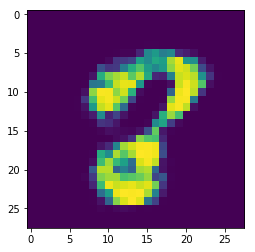

In [5]:
sampl = sess.run(g_sample,feed_dict={z: sample_z(5,100)})
I=np.reshape(sampl[1],(28,28))
#plt.imshow(np.reshape(sampl[1],(28,28)))
plt.imshow(I)
